In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/GP ITI/GP_cleaned.csv',parse_dates=True)
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:26,view,5875317,2029082628195353599,NaN,NaN,1.59,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe
1,2019-10-01 00:00:28,view,5692917,1487580004857414477,NaN,lianail,5.54,555446068,4257671a-efc8-4e58-96c2-3ab457916d78
2,2019-10-01 00:00:48,view,5819638,1487580008162526182,NaN,NaN,21.75,546705258,3b5c65c0-bb1c-453b-b340-4ebf973a3136
3,2019-10-01 00:00:53,view,5856191,1487580006350586771,appliances.environment.vacuum,runail,24.44,507355498,944c7e9b-40bd-4112-a05b-81e73f37e0c0
4,2019-10-01 00:01:11,view,5733176,1487580009362096156,NaN,NaN,0.60,543446752,4a01cad9-7368-fd9e-d907-d4d85de0b55c


In [4]:
df.shape

(8737867, 9)

In [5]:
df['event_time'] = pd.to_datetime(df['event_time'])

#Customer Behavior Study

**Understanding customer Behavior**

- Customer Interaction
- User Behavior By Day of Week 
- User Behavior By Day of Week For Events [remove from cart , cart , purchase]
- User Behavior by Time of Day
- Best Event Time For New User 
- conversion Rate 
- Best Event Time For Repeated Customer   
- Customer Purchase by Day of Month 
- Customer Purchase By Days of Week  
- New Customer VS. Repeated Customer 
- RFM KPI 
- Who is the most valuable customer based on thier purchase history ? 


<ipython-input-6-4e95823ef5af>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


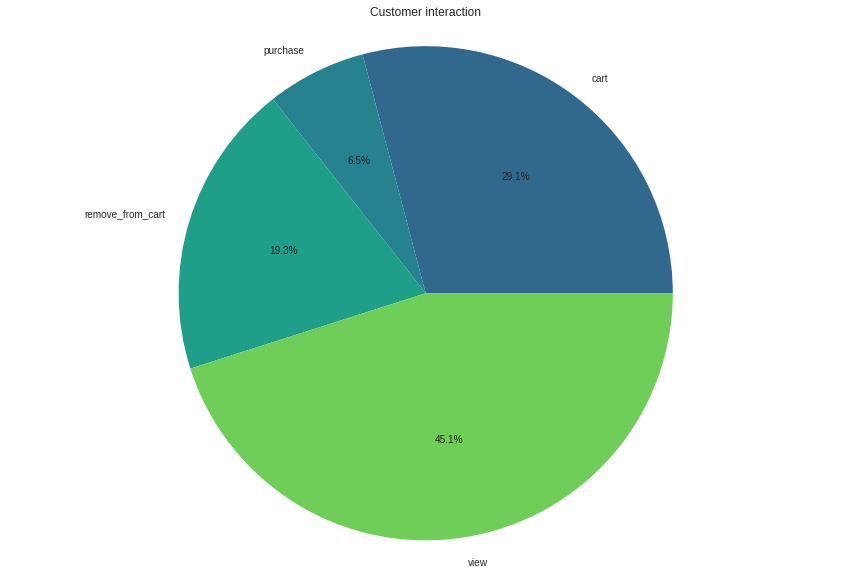

In [6]:
# The customer interaction 
plt.figure(figsize=(15,10))
e_type=df.groupby('event_type').size().reset_index(name='total')
plt.style.use('seaborn')
color=['#31688e','#26828e','#1f9e89','#6ece58']
plt.pie(e_type['total'],labels=e_type['event_type'],autopct='%1.1f%%',colors=color)
plt.title('Customer interaction')
plt.axis('equal')
plt.show()

We seperated the users into two categories:
- Visitors, people who never commited a purchase 
- customers , people who commited a purchase.

Then , we devided the customers into two categories: 
- New customers, who commited a single purchase  
- Regular customers , who commited more than 1 purcahse 

In [7]:
#customer dataframe 
df_not_view=df[df['event_type'].isin(['purchase'])]

In [8]:

!pip install pandasql
import pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=9fd747c41fbd322e87633bf3d89ffa50b3da3a104401fd963bba0ad9af806300
  Stored in directory: /root/.cache/pip/wheels/63/e8/ec/75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql


In [9]:
# here we utilized SQL query to get the number of user_id 
user_count = pandasql.sqldf("""

select user_id, count(*) as counts
from df_not_view
group by 1 
order by 2 desc

""")

In [10]:
# dataframe of the customer interaction(cart , purchase)
df_not_view_count = pd.merge(df_not_view, user_count, on ="user_id")
df_not_view_count 

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,counts
0,2019-10-01 00:06:35,purchase,5619862,1487580006895846315,NaN,runail,5.32,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,38
1,2019-10-01 00:06:35,purchase,5619866,1487580006895846315,NaN,runail,2.86,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,38
2,2019-10-01 00:06:35,purchase,5696184,1487580005134238553,NaN,runail,2.38,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,38
3,2019-10-01 00:06:35,purchase,5706784,1487580005092295511,NaN,runail,4.44,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,38
4,2019-10-01 00:06:35,purchase,5723503,1487580005134238553,NaN,runail,2.62,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe,38
...,...,...,...,...,...,...,...,...,...,...
568036,2019-11-30 23:18:18,purchase,5900632,1487580007675986893,NaN,freedecor,0.79,577834852,8d016ce9-0973-40e0-ae23-f906497fec1c,15
568037,2019-11-30 23:18:18,purchase,5901653,1487580007675986893,NaN,freedecor,0.79,577834852,8d016ce9-0973-40e0-ae23-f906497fec1c,15
568038,2019-11-30 23:18:18,purchase,5901656,1487580007675986893,NaN,freedecor,0.79,577834852,8d016ce9-0973-40e0-ae23-f906497fec1c,15
568039,2019-11-30 23:18:18,purchase,5906118,1487580007675986893,NaN,bpw.style,1.27,577834852,8d016ce9-0973-40e0-ae23-f906497fec1c,15


In [11]:
# dataframs for new customers and regulare(repeated) customers 
repeat_user = df_not_view_count[df_not_view_count["counts"] >1]
new_user = df_not_view_count[df_not_view_count["counts"] == 1]

In [12]:
new_user["category_code"].value_counts().head()

appliances.environment.vacuum    175
accessories.bag                   31
furniture.living_room.cabinet     14
furniture.bathroom.bath           13
stationery.cartrige               12
Name: category_code, dtype: int64

Most new users purchased category `appliances.environment.vacum`

- The e-commerce business team can make promo of this product category to attract more new customers.



In [13]:
repeat_user["category_code"].value_counts().head()

stationery.cartrige              2938
apparel.glove                    1834
appliances.environment.vacuum    1503
furniture.bathroom.bath           503
furniture.living_room.cabinet     105
Name: category_code, dtype: int64

*The most popular cotegory for regular customers*
- `stationery.cartrige` and `apparel.glove `

Best Event time to predict the new customer most likely to buy a product

In [14]:
# from the new user dataframe the count of unique sessions will give us info about the traffic per each day 
new_user_traffic = new_user.groupby([new_user['event_time'].dt.date])['user_session'].nunique().reset_index()


In [15]:
new_user_traffic.sort_values(by= 'user_session',ascending = False)

,event_time,user_session
54,2019-11-24,135
59,2019-11-29,133
58,2019-11-28,131
51,2019-11-21,114
37,2019-11-07,114
...,...,...
45,2019-11-15,56
39,2019-11-09,55
4,2019-10-05,54
32,2019-11-02,50


In [16]:
# Best Event time for regular/ repeated user 
repeat_user_traffic = repeat_user.groupby([repeat_user['event_time'].dt.date])['user_session'].nunique().reset_index()

In [17]:
repeat_user_traffic.sort_values(by= 'user_session',ascending = False)

,event_time,user_session
52,2019-11-22,2242
54,2019-11-24,1948
59,2019-11-29,1903
58,2019-11-28,1810
51,2019-11-21,1634
...,...,...
11,2019-10-12,734
39,2019-11-09,671
4,2019-10-05,670
18,2019-10-19,638


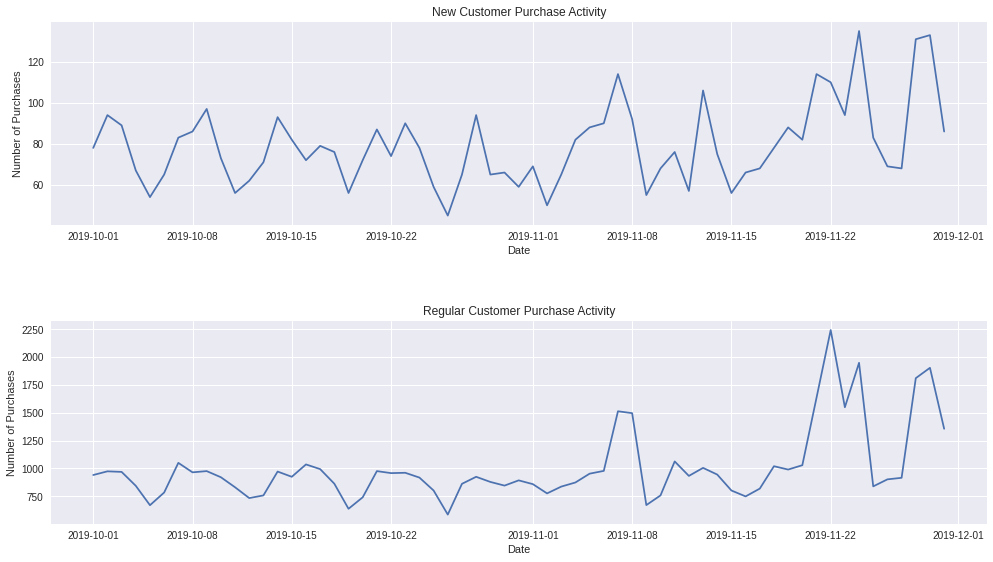

In [18]:
#Plotting number of daily visits
fig=plt.figure(figsize=(15,9))
ax1=fig.add_subplot(2,1,1)
sns.lineplot(x='event_time',
              y='user_session',
              data=new_user_traffic,
             ax=ax1)
plt.title('New Customer Purchase Activity')
plt.ylabel('Number of Purchases')
plt.xlabel('Date')

ax2=fig.add_subplot(2,1,2)
sns.lineplot(x='event_time',
              y='user_session',
              data= repeat_user_traffic,
            ax=ax2)
plt.title('Regular Customer Purchase Activity')
plt.ylabel('Number of Purchases')
plt.xlabel('Date')
fig.tight_layout(pad=5.0); 

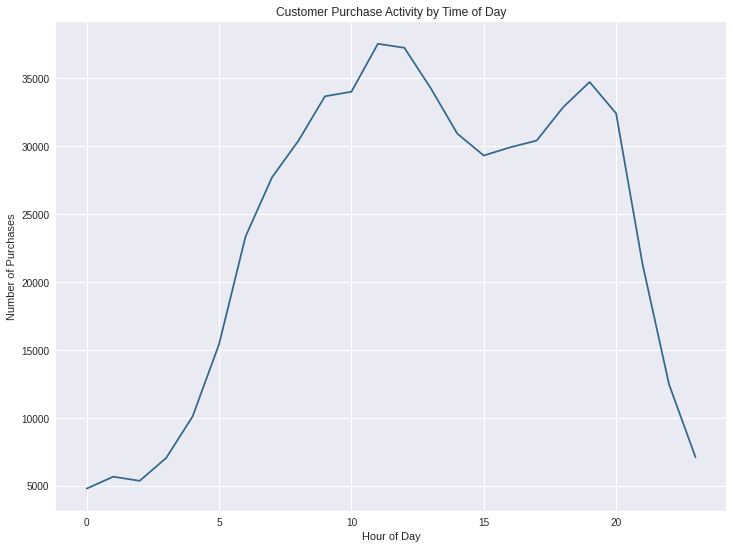

In [19]:
# Group the data by hour and count the number of events for each hour
hourly_events = df_not_view.groupby(df['event_time'].dt.hour)['event_type'].count()

plt.figure(figsize=(12,9))
sns.lineplot(x=hourly_events.index, y=hourly_events.values, color='#31688e')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Purchases')
plt.title('Customer Purchase Activity by Time of Day')
plt.show()

In [20]:
# daily visits 
daily_visits=df.groupby(by=[df['event_time'].dt.normalize()]).agg (Number_of_daily_visits =('user_session',lambda x: x.nunique()),
                                                                          Number_of_daily_visitors=('user_id',lambda x: x.nunique()))

In [21]:
#daily summary view
view_filter= df[df['event_type']=='view']
views= view_filter.groupby(view_filter['event_time'].dt.normalize()).agg(number_of_daily_views=('event_type','count')).reset_index()
daily_view=df.groupby(by=[df['event_time'].dt.normalize()]).agg (Number_of_daily_visits =('user_session',lambda x: x.nunique()),
                                                                       Number_of_daily_visitors=('user_id',lambda x: x.nunique()))
daily_summary_view=pd.merge(left=daily_view,
                          right= views,
                          left_on=['event_time'],
                          right_on=['event_time'],
                          how='left')

In [22]:
#sales
sales_filter= df[df['event_type']=='purchase']
sales= sales_filter.groupby(sales_filter['event_time'].dt.normalize()).agg(number_of_daily_sales=('event_type','count'),
                                                                           Total_daily_sales=('price','sum'),
                                                                           number_of_buyers = ('user_id','nunique')).reset_index()

In [23]:
#daily summary table
daily_summary_table=pd.merge(left=daily_visits,
                          right= sales,
                          left_on=['event_time'],
                          right_on=['event_time'],
                          how='left')

In [24]:
daily_summary_view

,event_time,Number_of_daily_visits,Number_of_daily_visitors,number_of_daily_views
0,2019-10-01,29361,19230,61206
1,2019-10-02,44113,33859,76495
2,2019-10-03,26654,16323,56932
3,2019-10-04,24165,14732,53672
4,2019-10-05,22899,14990,49410
...,...,...,...,...
56,2019-11-26,33216,20206,65873
57,2019-11-27,34664,19444,69246
58,2019-11-28,44251,23683,95785
59,2019-11-29,42006,21778,88782


In [25]:
daily_summary_table

,event_time,Number_of_daily_visits,Number_of_daily_visitors,number_of_daily_sales,Total_daily_sales,number_of_buyers
0,2019-10-01,29361,19230,8476,43497.17,1001
1,2019-10-02,44113,33859,9100,45746.20,1045
2,2019-10-03,26654,16323,8865,43380.98,1048
3,2019-10-04,24165,14732,7562,35887.15,892
4,2019-10-05,22899,14990,5940,29228.55,708
...,...,...,...,...,...,...
56,2019-11-26,33216,20206,8040,38881.74,951
57,2019-11-27,34664,19444,8209,40180.04,959
58,2019-11-28,44251,23683,16974,77470.54,1897
59,2019-11-29,42006,21778,17992,78143.19,2002


In [26]:
# calculating the conversion rate 
daily_summary_table['conversion_rate']=daily_summary_table['number_of_buyers']/daily_summary_table['Number_of_daily_visitors']

In [27]:
# daily summary table statistics 
daily_summary_table.describe()

,Number_of_daily_visits,Number_of_daily_visitors,number_of_daily_sales,Total_daily_sales,number_of_buyers,conversion_rate
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,30278.081967,18128.983607,9312.147541,44959.923443,1066.868852,0.058964
std,5713.002933,3615.918175,3649.447058,15971.683025,341.974096,0.013755
min,22899.000000,14533.000000,5295.000000,25359.180000,617.000000,0.026528
25%,26250.000000,16103.000000,7562.000000,36024.560000,888.000000,0.052281
50%,29288.000000,17353.000000,8299.000000,40785.220000,988.000000,0.057522
75%,32414.000000,18683.000000,8921.000000,45325.160000,1063.000000,0.061077
max,48480.000000,33859.000000,22780.000000,102783.330000,2315.000000,0.100451


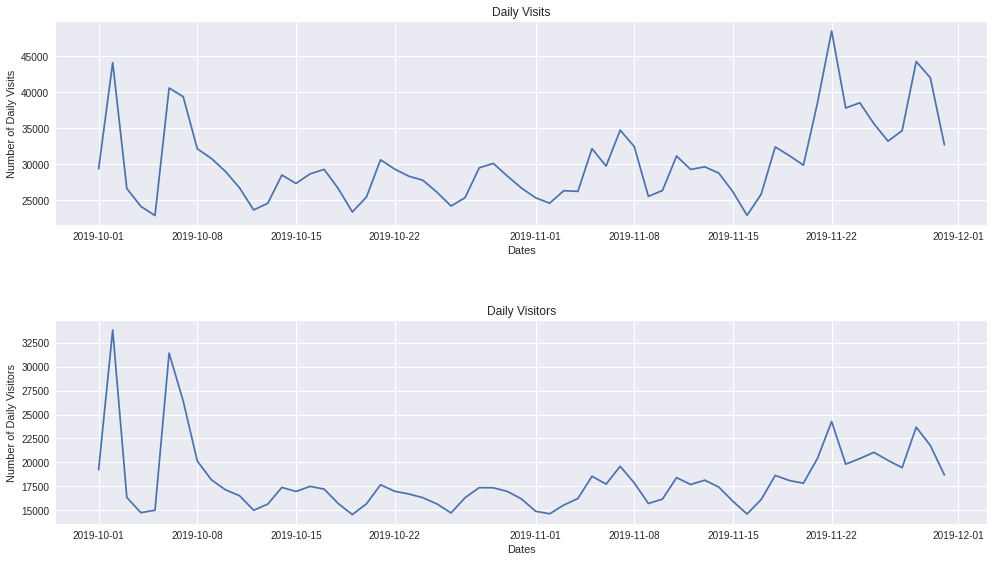

In [69]:
#Plotting number of daily visits
fig=plt.figure(figsize=(15,9))
ax1=fig.add_subplot(2,1,1)
sns.lineplot(x='event_time',
              y='Number_of_daily_visits',
              data=daily_summary_table,
             ax=ax1)
plt.title('Daily Visits')
plt.ylabel('Number of Daily Visits')
plt.xlabel('Dates')

ax2=fig.add_subplot(2,1,2)
sns.lineplot(x='event_time',
              y='Number_of_daily_visitors',
              data=daily_summary_table,
            ax=ax2)
plt.title('Daily Visitors')
plt.ylabel('Number of Daily Visitors')
plt.xlabel('Dates')
fig.tight_layout(pad=5.0);

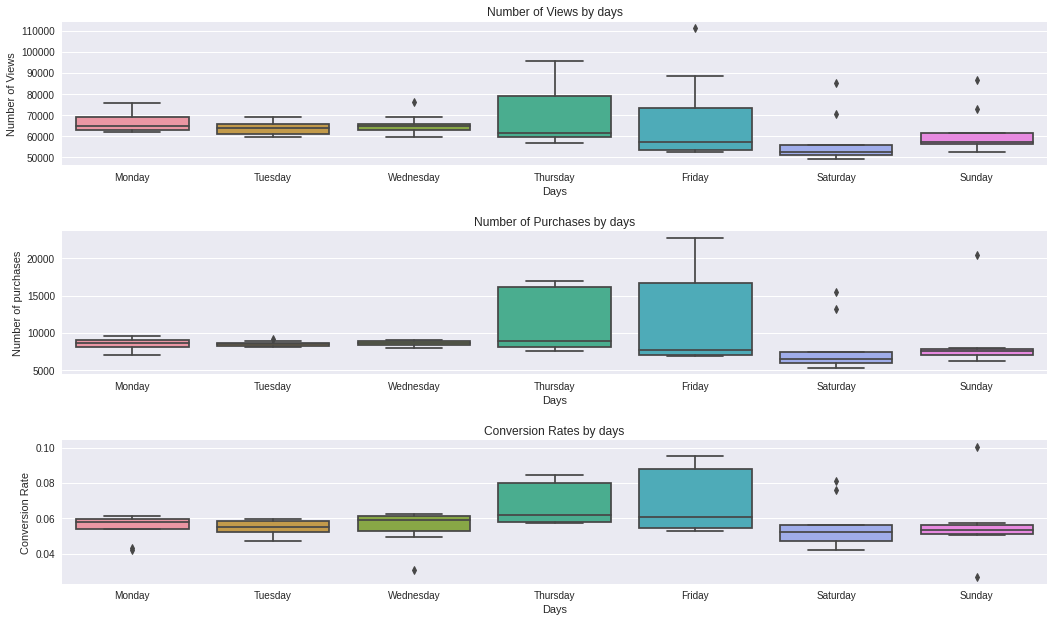

In [29]:
fig=plt.figure(figsize=(15,9))

ax1=fig.add_subplot(3,1,2)

sns.boxplot(x=daily_summary_table['event_time'].dt.dayofweek,
            y='number_of_daily_sales',
            data=daily_summary_table,
           ax=ax1)
plt.title('Number of Purchases by days')
plt.ylabel('Number of purchases')
plt.xlabel('Days')
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig.tight_layout(pad=2.0);

ax2=fig.add_subplot(3,1,1)
sns.boxplot(x=daily_summary_view['event_time'].dt.dayofweek,
            y='number_of_daily_views',
            data=daily_summary_view,
           ax=ax2)
plt.title('Number of Views by days')
plt.ylabel('Number of Views')
plt.xlabel('Days')
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig.tight_layout(pad=2.0);

ax3=fig.add_subplot(3,1,3)
sns.boxplot(x=daily_summary_table['event_time'].dt.day_of_week,
            y='conversion_rate',
            data= daily_summary_table,
           ax=ax3)
plt.title('Conversion Rates by days')
plt.ylabel('Conversion Rate')
plt.xlabel('Days')
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig.tight_layout(pad=2.0);

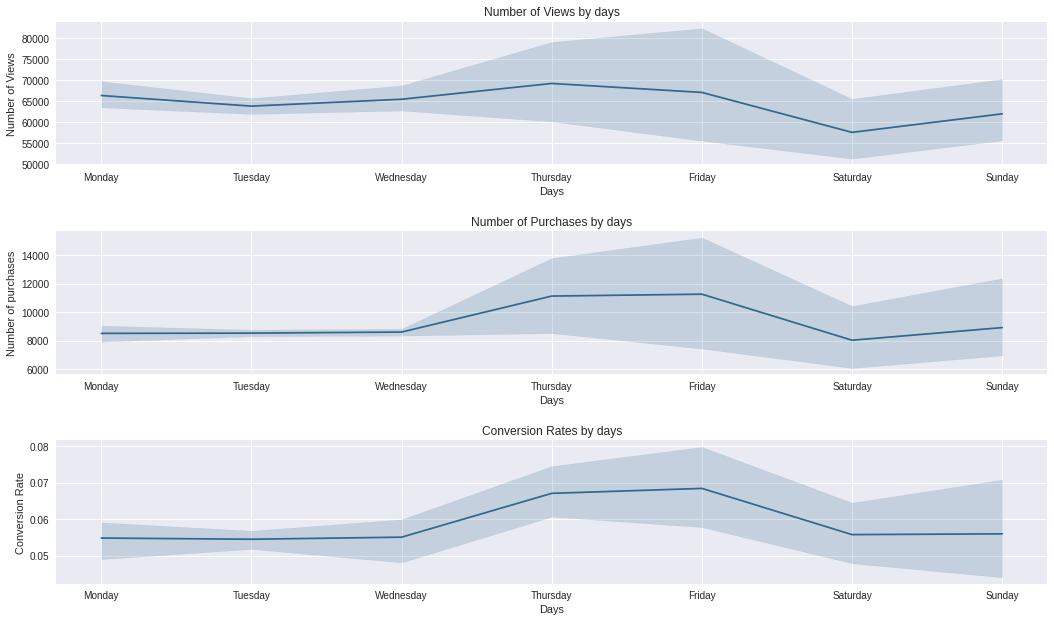

In [30]:
# polotting the number of views and the number of purchases and the conversion rate all by the week day 
fig=plt.figure(figsize=(15,9))

ax1=fig.add_subplot(3,1,2)

sns.lineplot(x=daily_summary_table['event_time'].dt.dayofweek,
            y='number_of_daily_sales',
            data=daily_summary_table,
           ax=ax1,color='#31688e')
plt.title('Number of Purchases by days')
plt.ylabel('Number of purchases')
plt.xlabel('Days')
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig.tight_layout(pad=2.0);

ax2=fig.add_subplot(3,1,1)
sns.lineplot(x=daily_summary_view['event_time'].dt.dayofweek,
            y='number_of_daily_views',
            data=daily_summary_view,
           ax=ax2,color='#31688e')
plt.title('Number of Views by days')
plt.ylabel('Number of Views')
plt.xlabel('Days')
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig.tight_layout(pad=2.0);

ax3=fig.add_subplot(3,1,3)
sns.lineplot(x=daily_summary_table['event_time'].dt.day_of_week,
            y='conversion_rate',
            data= daily_summary_table,
           ax=ax3,color='#31688e')
plt.title('Conversion Rates by days')
plt.ylabel('Conversion Rate')
plt.xlabel('Days')
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig.tight_layout(pad=2.0);

**Insight**
- it seems like all the viewing , add to cart happen in Thursdays then the most of purchasing taking place on Fridays. 
- The conversion rate also increases on Fridays.  

**Top Customers based on thier purchase history**

In [31]:
#customer Activities  

#First by filtering sales activities
sales_filter= df[df['event_type']=='purchase']
customer_table= sales_filter.groupby(['user_id']).agg(number_of_purchases=('user_id','count'),
                                                    total_sales=('price','sum')).reset_index()
customer_table

,user_id,number_of_purchases,total_sales
0,9794320,4,12.68
1,10079204,2,25.81
2,10280338,16,54.83
3,15781728,2,20.31
4,19762782,8,80.29
...,...,...,...
52518,579906406,2,9.68
52519,579916096,4,9.42
52520,579924768,3,8.54
52521,579925377,6,38.23


<ipython-input-32-324c4020ee47>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


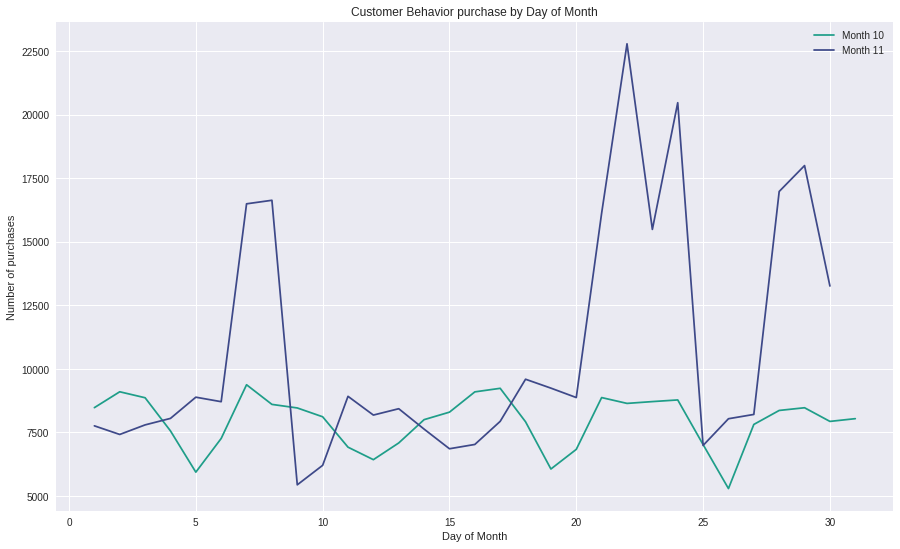

In [32]:
#plotting customer behavior in week of month after purchase
fig=plt.figure(figsize=(15,9))
# Group the data by day of the month and count the number of events for each day
behavior=df[df['event_type']=='purchase']

# Group the data by month and day of the month, and count the number of events for each day
events_by_month_day = behavior.groupby([behavior['event_time'].dt.month, behavior['event_time'].dt.day])['event_type'].count()

# Get the data for each month separately
events_by_day_month1 = events_by_month_day.loc[10]
events_by_day_month2 = events_by_month_day.loc[11]

plt.style.use('seaborn')

# Create two lines on the same graph, one for each month
sns.lineplot(x=events_by_day_month1.index, y=events_by_day_month1.values, label='Month 10',color='#1f9e89')
sns.lineplot(x=events_by_day_month2.index, y=events_by_day_month2.values, label='Month 11',color='#3e4989')

plt.xlabel('Day of Month')
plt.ylabel('Number of purchases')
plt.title('Customer Behavior purchase by Day of Month')
plt.legend() # Add a legend to differentiate the two lines
plt.show()

In [33]:
#calculating total revenue 
df_purchase=df[df['event_type']=='purchase']
total_revenue=df_purchase['price'].sum()
print('total sales ${:,.2f}'.format(total_revenue))

total sales $2,742,555.33


<ipython-input-34-6004fe1dc0bd>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


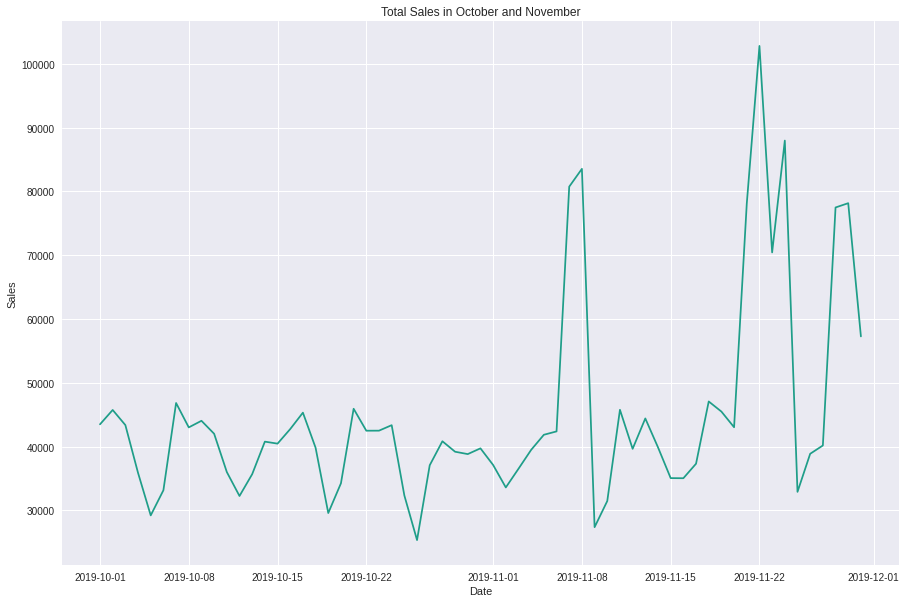

In [34]:
#plotting total sales trend in 2019
plt.figure(figsize=(15,10))
plt.style.use('seaborn')
oct_nov = df[(df['event_type'] == 'purchase') &
             (df['event_time'].dt.month.isin([10, 11]))]

sales = oct_nov.groupby(oct_nov['event_time'].dt.date)['price'].sum()

plt.plot(sales.index, sales.values,color='#1f9e89')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Total Sales in October and November')
plt.show()


In [36]:
# top purchased category on fridays 
df_purchased= df[df['event_time']=='purchase']
df_purchased[df_purchased["event_time"].dt.day_name()=="Friday"]["category_code"].value_counts().head(10)

Series([], Name: category_code, dtype: int64)

**stationery.cartrige** has become the `category_code` that is most in demand at a specific time of the day by customers in 2019. Number of purchases of **stationery.cartrige** goods reached **477** units on **All Fridays**.

In [37]:
#top 10 products purchased on fridays
df_purchased[df_purchased["event_time"].dt.day_name()=="Friday"]["product_id"].value_counts().head(10)

Series([], Name: product_id, dtype: int64)

In [38]:
# brands on the products the are purchased on Fridays
df_purchased[df_purchased['product_id'].isin([5809910,5854897,5751422,5833330,5849033,5751383,5700037,5815662,5809912,5304])]['brand'].value_counts()

Series([], Name: brand, dtype: int64)

**Insights** 
- the number of purchases has the be correlated with the revenue 
- from the total sales in November and October plot , the highest revenue ever made took place in 22/11/2019 and 23/11/2019 and the *Black Friday* of 2019 was in 22/11/2019 so we assume that the revenue was high due to *Black Friday*.

In [40]:
from datetime import datetime
day = (df['event_time'].dt.date == datetime(2019, 11, 22).date())
df_filtered = df.loc[day]

df_filtered['dayname'] = df_filtered['event_time'].dt.normalize().dt.day_name()

print(df_filtered[['event_time', 'dayname']])

                 event_time dayname
3195205 2019-11-22 00:00:03  Friday
3195206 2019-11-22 00:00:17  Friday
3195207 2019-11-22 00:00:21  Friday
3195208 2019-11-22 00:00:21  Friday
3195209 2019-11-22 00:00:22  Friday
...                     ...     ...
7946525 2019-11-22 23:59:50  Friday
7946526 2019-11-22 23:59:52  Friday
7946527 2019-11-22 23:59:55  Friday
7946528 2019-11-22 23:59:57  Friday
7946529 2019-11-22 23:59:57  Friday

[270068 rows x 2 columns]


<ipython-input-40-4c62b2d67d58>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['dayname'] = df_filtered['event_time'].dt.normalize().dt.day_name()


In [41]:
# revenue gain on Black Friday
day= (df['event_time'].dt.date == datetime(2019, 11, 22).date()) & (df['event_type'] == 'purchase')
blck_fri_df = df.loc[day]


revenue_in_nov22 = blck_fri_df['price'].sum()

print('Revenue in November 22, 2019: ${:,.2f}'.format(revenue_in_nov22))
print('The percent share of Black Friday in 2019:', (revenue_in_nov22/ total_revenue)*100,'%')

Revenue in November 22, 2019: $102,783.33
The percent share of Black Friday in 2019: 3.747721290275662 %


In [42]:
# top purchased category on black friday 
blck_fri_df["category_code"].value_counts().head(10)

stationery.cartrige                       110
apparel.glove                              70
appliances.environment.vacuum              43
furniture.bathroom.bath                    24
furniture.living_room.cabinet               4
accessories.cosmetic_bag                    2
accessories.bag                             2
appliances.personal.hair_cutter             1
appliances.environment.air_conditioner      1
Name: category_code, dtype: int64

In [43]:
#top 10 products purchased on black friday
blck_fri_df["product_id"].value_counts().head(10)

5809910    153
5854897     90
5833330     86
5809912     82
5751422     81
5849033     73
5700037     62
5792800     62
5751383     58
5815662     58
Name: product_id, dtype: int64

In [68]:
# the top 10 products that generate revenue on black friday
blck_fri_df.groupby('product_id').agg(product_revenue=('price','sum')).reset_index().sort_values(by='product_revenue',ascending=False).head(10)

,product_id,product_revenue
564,5560754,2074.60
6412,5850281,1439.79
2728,5751422,823.77
4287,5809910,743.58
6389,5849033,700.07
8965,5898227,662.24
3671,5792800,594.58
2704,5751383,556.22
2731,5751742,434.24
4289,5809912,380.08


In [44]:
# brands on the products the are purchased on Fridays
blck_fri_df[blck_fri_df['product_id'].isin([
5809910     ,
5854897     ,
5833330     ,
5809912     ,
5751422     ,
5849033     ,
5700037     ,
5792800     ,
5751383     ,
5815662   ])]['brand'].value_counts()

grattol      235
uno          212
irisk         90
bpw.style     86
runail        62
Name: brand, dtype: int64

# Product Analysis

Which products do users visit the most during a session?




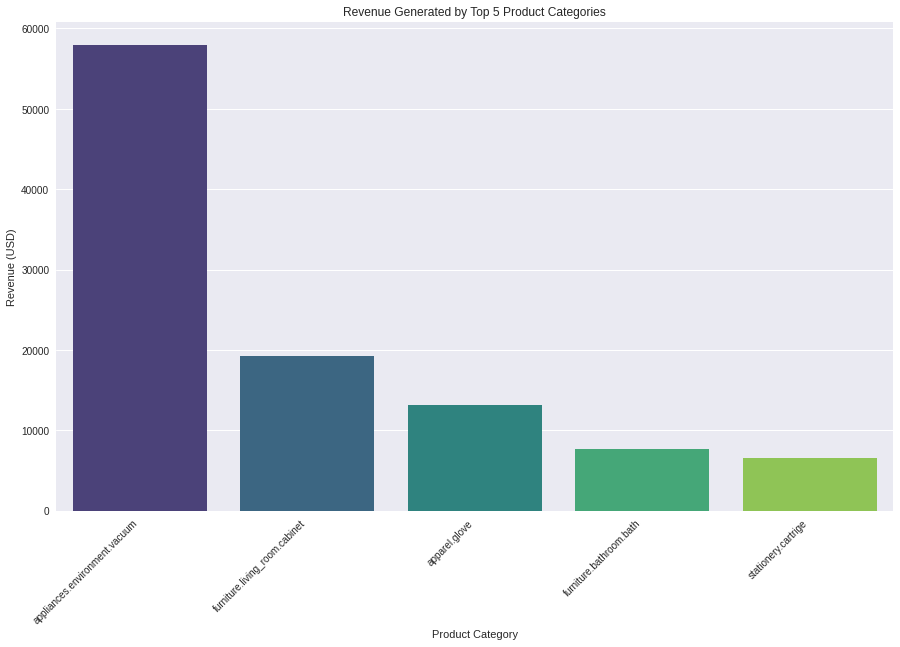

In [45]:
purchases_df=df[df['event_type']=='purchase']
revenue_by_category = purchases_df.groupby('category_code')['price'].sum().reset_index()

# Select the top 5 categories by revenue
top_5_categories = revenue_by_category.sort_values('price', ascending=False).head(5)

# Create a bar chart to visualize the revenue generated by each product category
plt.figure(figsize=(15,9))
sns.barplot(x='category_code', y='price', data=top_5_categories,palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Revenue Generated by Top 5 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Revenue (USD)')
plt.show()

<ipython-input-46-c036c0e6a4ec>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


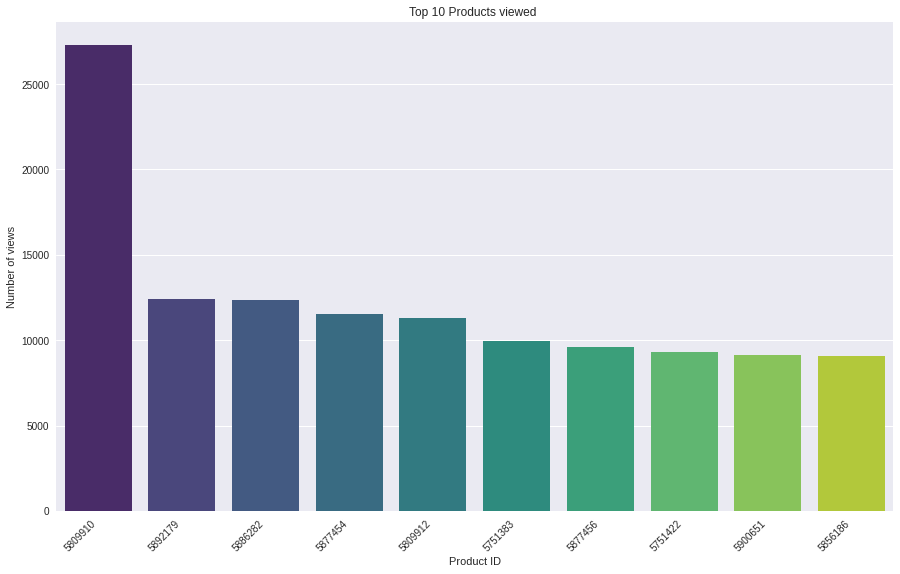

In [46]:
# is highest product viewed is also highest product purchased 
view_df = df[df['event_type'].isin(['view'])]

top_views = view_df.groupby(['product_id']).agg(views_count=('event_type','count')).reset_index().sort_values(by='views_count', ascending=False)

# Create a bar plot of the top 10 products visited by users during a session using seaborn
plt.figure(figsize=(15,9))
plt.style.use('seaborn')
sns.barplot(x='product_id', y='views_count', data=top_views , palette='viridis', order=top_views.head(10)['product_id'])
plt.title('Top 10 Products viewed ')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product ID')
plt.ylabel('Number of views')
plt.show()


<ipython-input-47-ebdb36a1d0d2>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


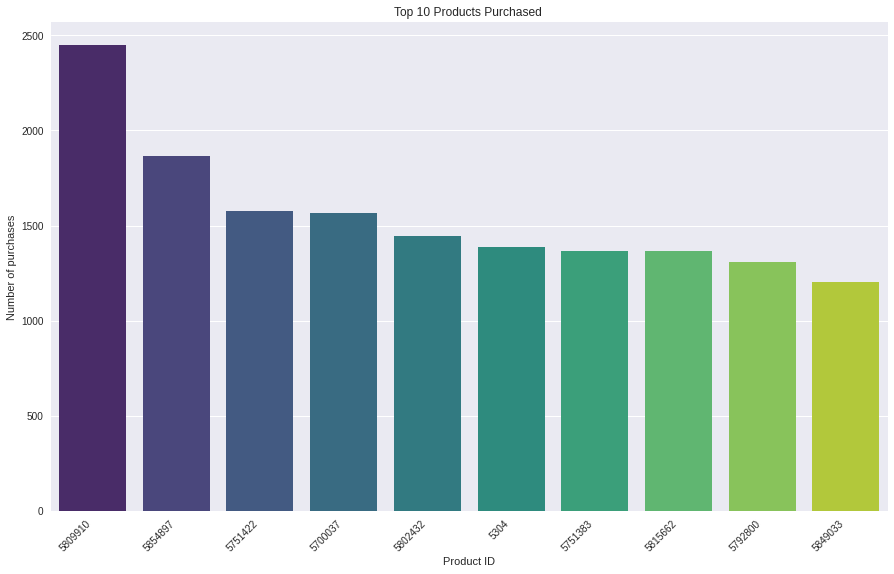

In [47]:
# is highest product viewed is also highest product purchased 
purchase_df = df[df['event_type'].isin(['purchase'])]

top_purchases = purchase_df.groupby(['product_id']).agg(purchases_count=('event_type','count')).reset_index().sort_values(by='purchases_count', ascending=False)

# Create a bar plot of the top 10 products visited by users during a session using seaborn
plt.figure(figsize=(15,9))
plt.style.use('seaborn')
sns.barplot(x='product_id', y='purchases_count', data=top_purchases , palette='viridis', order=top_purchases.head(10)['product_id'])
plt.title('Top 10 Products Purchased ')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product ID')
plt.ylabel('Number of purchases')
plt.show()


**What is the average number of products added to a cart during a session?**

___

In [48]:
cart_df = df[df['event_type'] == 'purchase']

products_added_by_session = cart_df.groupby('user_session')['product_id'].count()

avg_products_per_session = products_added_by_session.mean()

print(f"The average number of products purchased during a session is {avg_products_per_session:.2f}") ## trunk


The average number of products purchased during a session is 8.65


### Products with least interaction That might be used for marketing campigans 

In [49]:
## least interactions per each product
interactions_by_product = df[df['event_type'].isin(['view', 'cart', 'purchase'])].groupby('product_id')['user_session'].nunique().reset_index()

# Sort the interactions_by_product DataFrame by the user_id column in ascending order
interactions_by_product_sorted = interactions_by_product.sort_values('user_session')
interactions_by_product_sorted.head(10)

,product_id,user_session
22826,5822504,1
11882,5748036,1
11879,5748006,1
11878,5748000,1
11877,5747996,1
11820,5746969,1
2861,5564234,1
11816,5746959,1
11813,5746953,1
11812,5746951,1


In [50]:
interactions_by_product_sorted.tail(10)

,product_id,user_session
19686,5809911,8871
16673,5792800,9314
38195,5877454,9573
40745,5886282,10165
29851,5849033,10190
41988,5892179,10392
12068,5751383,12235
19687,5809912,12315
12107,5751422,12541
19685,5809910,27893


 ## Products with high revenue products

In [51]:
# Filter for only the "purchase" event type
purchase_data = df[df["event_type"] == "purchase"]

# Group the data by product ID and sum the price column
revenue_by_product = purchase_data.groupby("product_id")["price"].sum().reset_index()

# Sort the data by revenue in descending order
revenue_by_product = revenue_by_product.sort_values(by="price", ascending=False)

# Print the top 10 products by revenue
print(revenue_by_product.head(10))

       product_id     price
1430      5560754  31672.08
27783     5877454  18727.02
7687      5751422  16953.96
7649      5751383  13909.71
1431      5560756  13636.68
1166        89343  13356.45
11155     5792800  13285.40
22917     5856186  13219.73
13486     5809910  12540.87
21287     5849033  12100.86


**It's important to have a mix of products that perform well in different areas to appeal to a variety of customers.**

# Products with the highest conversion From just viewed to purchases 

In [52]:
# Filter for only the "view" and "purchase" event types
view_data = df[df["event_type"] == "view"]
purchase_data = df[df["event_type"] == "purchase"]

# Group the view and purchase data by product ID and count the number of occurrences
views_by_product = view_data.groupby("product_id")["event_type"].count().reset_index()
purchases_by_product = purchase_data.groupby("product_id")["event_type"].count().reset_index()

# Merge the view and purchase data on product ID
conversion_data = pd.merge(views_by_product, purchases_by_product, on="product_id", how="left")

# Calculate the conversion rate by dividing purchases by views
conversion_data["conversion_rate"] = conversion_data["event_type_y"] / conversion_data["event_type_x"]

# Sort the data by conversion rate in descending order
conversion_data = conversion_data.sort_values(by="conversion_rate", ascending=False)

# Print the top 10 products by conversion rate
print(conversion_data.head(10))

       product_id  event_type_x  event_type_y  conversion_rate
42336     5894911            11          39.0         3.545455
42334     5894909            25          81.0         3.240000
42341     5894916            12          38.0         3.166667
42345     5894920            15          46.0         3.066667
8775      5706719             3           9.0         3.000000
38293     5877788            42         126.0         3.000000
38294     5877789            35          95.0         2.714286
18165     5802430             7          19.0         2.714286
42331     5894906            31          84.0         2.709677
40883     5887054            23          62.0         2.695652


**Most popular products based on purchase**

In [53]:
# Group the data by product ID and count the number of occurrences
popularity_data = df.groupby("product_id")["event_type"].count().reset_index()

# Sort the data by popularity in descending order
popularity_data = popularity_data.sort_values(by="event_type", ascending=False)

# Print the top 10 products by popularity
print(popularity_data.head(10))

       product_id  event_type
19809     5809910       41902
8335      5700037       21142
19811     5809912       20431
12179     5751422       19188
12140     5751383       18874
18304     5802432       17374
32075     5854897       16684
21528     5815662       16049
30057     5849033       16008
16776     5792800       14815


# Brand analysis
- Items are most viewed by Visitors/Customers
- Brands are most viewed by Visitors/Customers
- Brands are most purchased by Visitors/Customers

<ipython-input-54-6293a1bcf795>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


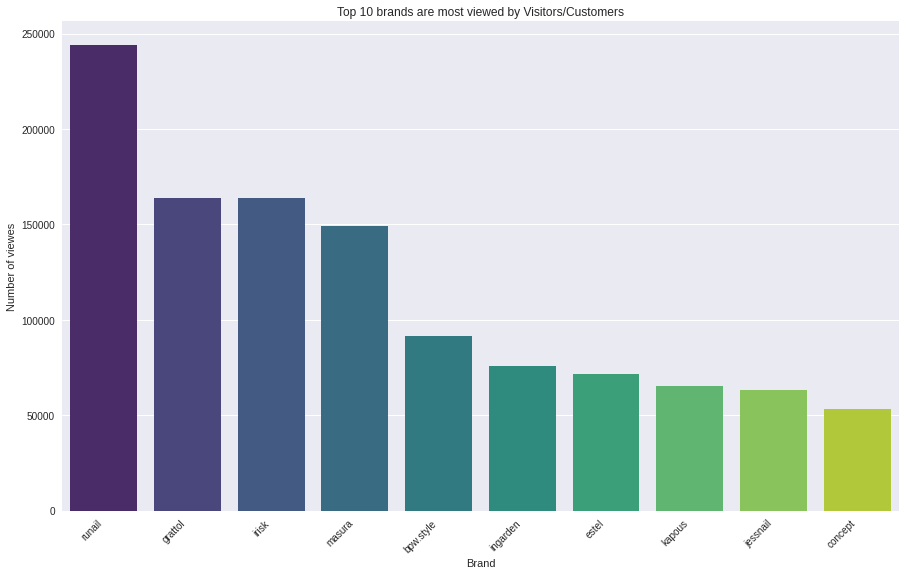

In [54]:
# Filter the DataFrame to include only "purchase" events
plt.style.use('seaborn')
purchases_df = df[df['event_type'] == 'view']

# Group the purchases DataFrame by brand and count the number of purchases for each brand
brand_counts = purchases_df.groupby('brand')['user_id'].count().reset_index()

# Sort the brands by the number of purchases in descending order
brand_counts_sorted = brand_counts.sort_values(by='user_id', ascending=False)

# Create a bar plot of the number of purchases for each brand using seaborn
plt.figure(figsize=(15,9))
sns.barplot(x='brand', y='user_id', data=brand_counts_sorted.head(10),palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Brand')
plt.ylabel('Number of viewes')
plt.title('Top 10 brands are most viewed by Visitors/Customers')
plt.show()

<ipython-input-55-28945f2f1c1e>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


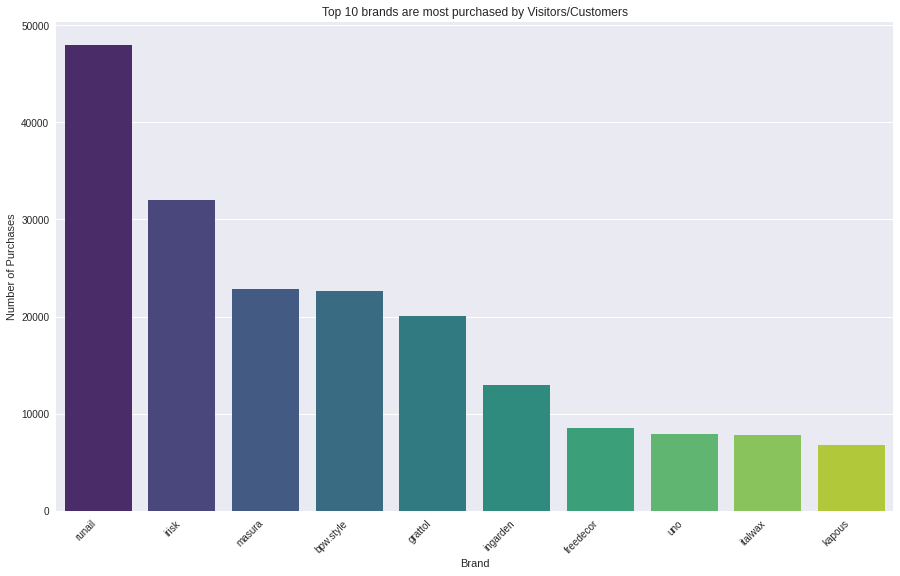

In [55]:
# Filter the DataFrame to include only "purchase" events
plt.style.use('seaborn')
purchases_df = df[df['event_type'] == 'purchase']

# Group the purchases DataFrame by brand and count the number of purchases for each brand
brand_counts = purchases_df.groupby('brand')['user_id'].count().reset_index()

# Sort the brands by the number of purchases in descending order
brand_counts_sorted = brand_counts.sort_values(by='user_id', ascending=False)

# Create a bar plot of the number of purchases for each brand using seaborn
plt.figure(figsize=(15,9))
sns.barplot(x='brand', y='user_id', data=brand_counts_sorted.head(10),palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Brand')
plt.ylabel('Number of Purchases')
plt.title('Top 10 brands are most purchased by Visitors/Customers')
plt.show()


these are the top 10 products being purchased on friday ,we decided to make every two fridays offers on these products

In [56]:
df[df['brand']=='runail']['category_code'].value_counts()

appliances.environment.vacuum    7940
furniture.living_room.cabinet    1685
stationery.cartrige               724
furniture.bathroom.bath           520
Name: category_code, dtype: int64

**This indicates that the brand with the highest number of purchased categories is at the top.**







 **The most valuable customers based on their purchase history**

In [57]:
# top 16 products of prices in df 
df_highest_prices = df[df['price'] > 200]

In [58]:
pivot = df_highest_prices.pivot_table(index=df_highest_prices['event_time'].dt.normalize(), columns='product_id', values='price')

Text(0.5, 1.0, 'Top 16 Highest Products')

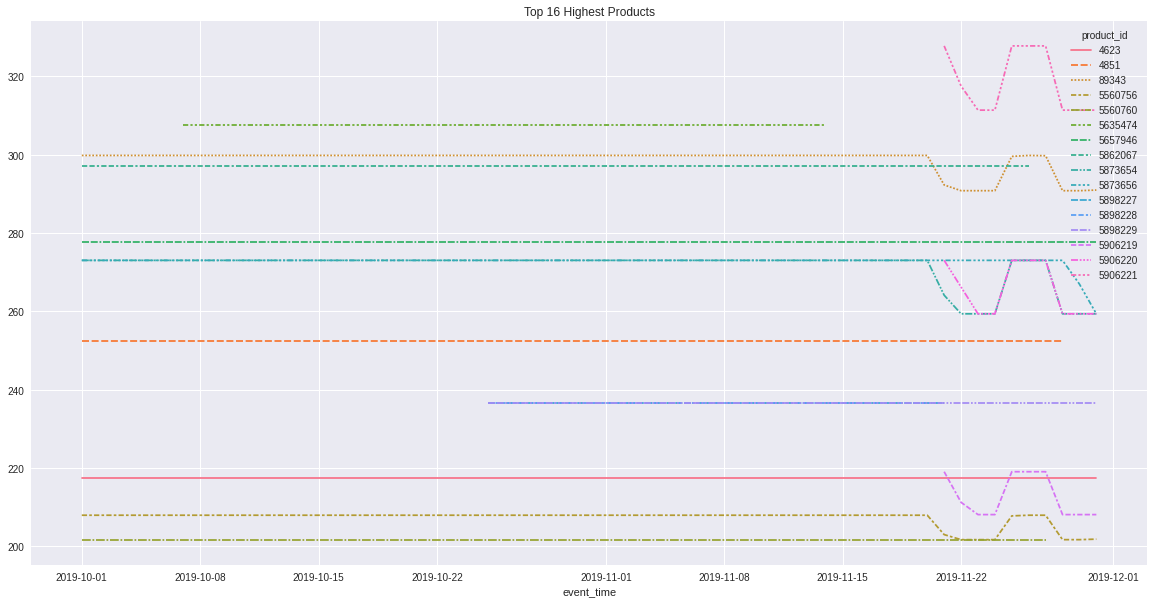

In [59]:
plt.figure(figsize=(20,10))
sns.lineplot(data=pivot)
plt.title("Top 16 Highest Products")

In [60]:
# Group the data by product_id and calculate the minimum and maximum prices for each product
price_data = df.groupby("product_id").agg(min_price=("price", "min"), max_price=("price", "max"))

# Calculate the percentage change in price for each product
price_data["price_change"] = (price_data["max_price"] - price_data["min_price"])

# Select only the products with a price increase of 50% or more
selected_products = price_data[price_data["price_change"] >= 50]
top_10changes = selected_products['price_change'].sort_values(ascending = False).index[:10]
# Print the list of selected products
top_10changes_df = df[df['product_id'].isin(top_10changes)]
top_10changes_df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
414723,2019-10-07 14:01:22,view,5893077,1487580013388628160,NaN,NaN,0.00,529499777,4b1cdda7-1756-47bb-bc0c-7ab395d3bd12
528340,2019-10-09 09:02:08,view,5893077,1487580013388628160,NaN,NaN,0.00,550772898,55d092b0-5fa2-4470-869e-784d662a6fbe
531340,2019-10-09 09:53:13,view,5893077,1487580013388628160,NaN,NaN,0.00,558391237,717d197e-d025-47f9-8a3e-c434e23d7e76
554739,2019-10-09 15:39:09,view,5894357,1487580013279576251,NaN,NaN,0.00,558494082,fde16614-46f3-4fab-bbad-81fdef2888a8
609207,2019-10-10 13:22:31,view,5893077,1487580013388628160,NaN,NaN,0.00,558807471,63c11cac-b4f2-46f1-aa24-77e2e2f89d51
...,...,...,...,...,...,...,...,...,...
8632592,2019-11-29 20:13:28,cart,5906217,1487580006300255120,NaN,strong,165.11,526365948,47b1cc32-3e44-4a2a-8160-d9a2ae5685b4
8647729,2019-11-30 00:37:34,cart,5906221,1487580006300255120,NaN,strong,311.38,579340056,200c2f4e-e924-4474-8092-5d8d8ac11647
8648039,2019-11-30 00:53:01,cart,5893077,1487580013388628160,NaN,NaN,109.19,579340056,200c2f4e-e924-4474-8092-5d8d8ac11647
8725395,2019-11-30 20:02:52,cart,5906219,1487580006300255120,NaN,strong,208.10,575863320,39ff0fb9-b739-4ac9-a9a1-bada396e5be2


<ipython-input-61-b53ce36998bf>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


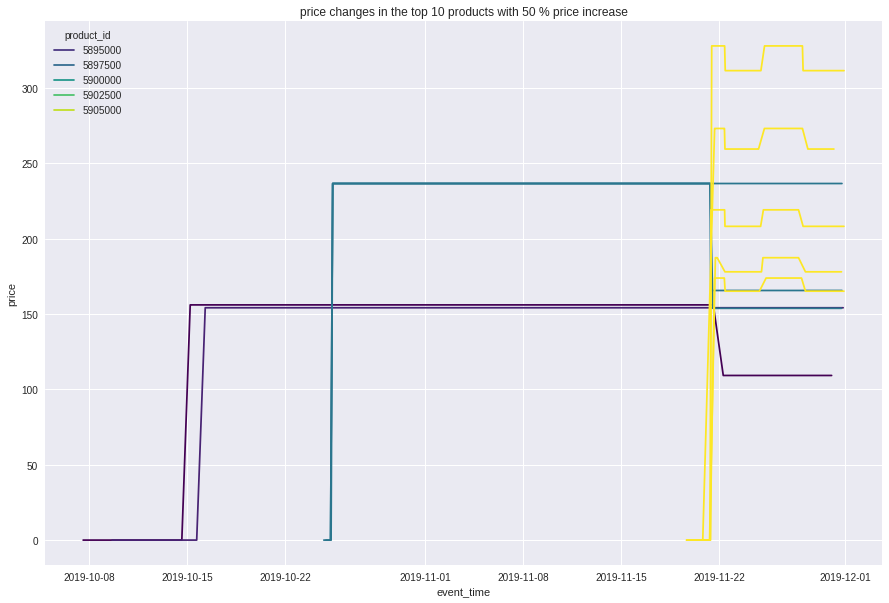

In [61]:
plt.figure(figsize=(15,10))
plt.style.use('seaborn')
sns.lineplot(x= 'event_time', y= 'price', data = top_10changes_df, hue='product_id',palette='viridis')
plt.xlabel('event_time')
plt.ylabel('price')
plt.title("price changes in the top 10 products with 50 % price increase")
plt.show()

<ipython-input-62-6b1274e2bf84>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-62-6b1274e2bf84>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Figure size 1080x720 with 0 Axes>

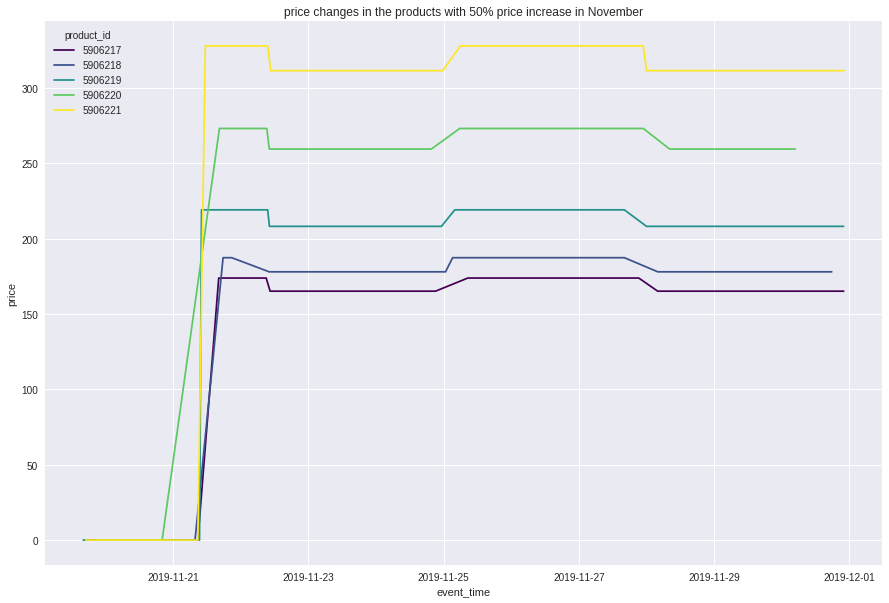

In [62]:
from seaborn.widgets import color_palette
plt.figure(figsize=(15,10))
plt.style.use('seaborn')
oct_nov = top_10changes_df[top_10changes_df['event_time'].dt.month.isin([11])]
prod = oct_nov[oct_nov['product_id'].isin([  5906219, 5906218,
       5906221, 5906217, 5906220])]
plt.figure(figsize=(15,10))
plt.style.use('seaborn')

sns.lineplot(x= 'event_time', y= 'price', data = prod, hue='product_id',palette='viridis')
plt.xlabel('event_time')
plt.ylabel('price')
plt.title("price changes in the products with 50% price increase in November")
plt.show()


<ipython-input-63-4243f22b6821>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


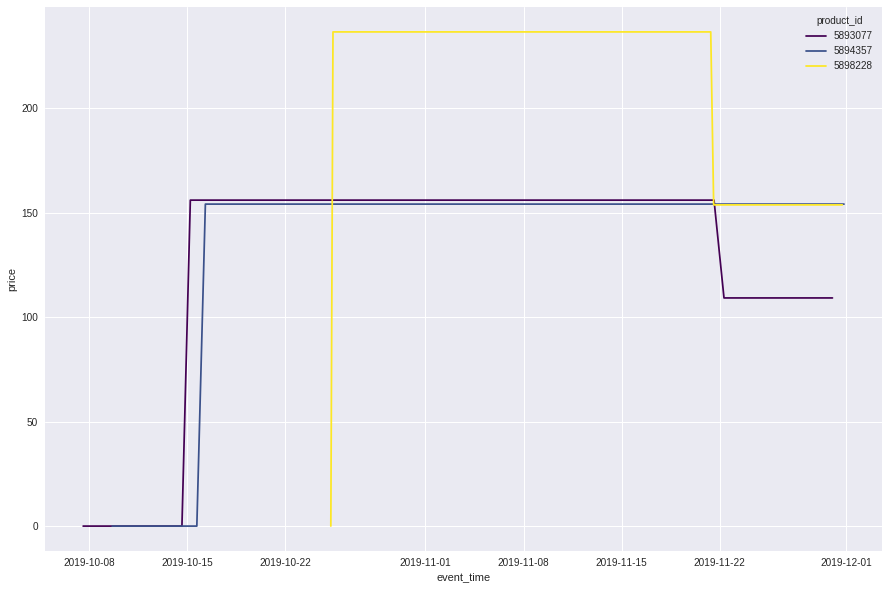

In [63]:
prod = top_10changes_df[top_10changes_df['product_id'].isin([5894357, 5893077, 5898228]) ]
plt.figure(figsize=(15,10))
plt.style.use('seaborn')
sns.lineplot(x= 'event_time', y= 'price', data = prod, hue='product_id',palette='viridis')
plt.xlabel('event_time')
plt.ylabel('price')
plt.show()

# Customer Segmentation RFM and CLV KPI 

In [64]:
purchase = df[df['event_type'] == 'purchase']
purchase = purchase[['user_session', 'price', 'user_id', 'event_time']]
data = purchase.groupby(by='user_session').agg(
    Date_order=('event_time', 'max'),
    user_id=('user_id', 'unique'),
    Quantity=('user_session', 'count'),
    money_spent=('price', 'sum')
).reset_index(drop=True)
data['user_id'] = data['user_id'].str[0]

import datetime as dt
study_date = dt.datetime(2019,12,1)
data=pd.DataFrame(data)
data['last_purchase']=study_date - data['Date_order']
data['last_purchase'].astype('timedelta64[D]')
data['last_purchase']=data['last_purchase'] / np.timedelta64(1, 'D')


#Calculate Recency, Frequency, and Monetary of the data
RFM= data.groupby('user_id').agg(Recency=('last_purchase',lambda x: x.min()),
                                 Frequency=('user_id',lambda x: x.count()),
                                 Monetary=('money_spent',lambda x: x.sum()))




RFM['R_rank'] = RFM['Recency'].rank(ascending=False)
RFM['F_rank'] = RFM['Frequency'].rank(ascending=True)
RFM['M_rank'] = RFM['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
RFM['R_rank_norm'] = (RFM['R_rank']/RFM['R_rank'].max())*100
RFM['F_rank_norm'] = (RFM['F_rank']/RFM['F_rank'].max())*100
RFM['M_rank_norm'] = (RFM['F_rank']/RFM['M_rank'].max())*100
 
RFM.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

# giving weights to each rank 

RFM['RFM_Score'] = 0.15*RFM['R_rank_norm']+0.28 *RFM['F_rank_norm']+0.57*RFM['M_rank_norm']
RFM['RFM_Score'] *= 0.05
RFM = RFM.round(2)
# segmenting customer
RFM["Customer_segment"] = np.where(RFM['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        RFM['RFM_Score'] > 3,
                                        "High value Customer",
                                        (np.where(
    RFM['RFM_Score'] > 2,
                             "Medium Value Customer",
                             np.where(RFM['RFM_Score'] > 1,
                            'Low Value Customers', 'Lost Customers'))))))


In [65]:
RFM[RFM['Customer_segment'] == "Top Customers"].sort_values(by='RFM_Score', ascending=False)

,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
user_id,,,,,,,,
553201648,0.16,9,228.31,99.76,99.92,99.92,5.00,Top Customers
495911528,0.03,8,254.04,100.00,99.90,99.90,5.00,Top Customers
492650335,0.25,7,335.71,99.29,99.82,99.82,4.99,Top Customers
538478396,0.07,7,310.97,99.96,99.82,99.82,4.99,Top Customers
459377142,0.16,9,755.66,99.72,99.92,99.92,4.99,Top Customers
...,...,...,...,...,...,...,...,...
558689117,1.53,2,113.89,95.04,89.37,89.37,4.51,Top Customers
474661344,1.51,2,83.83,95.12,89.37,89.37,4.51,Top Customers
475170354,1.65,2,102.58,94.34,89.37,89.37,4.51,Top Customers


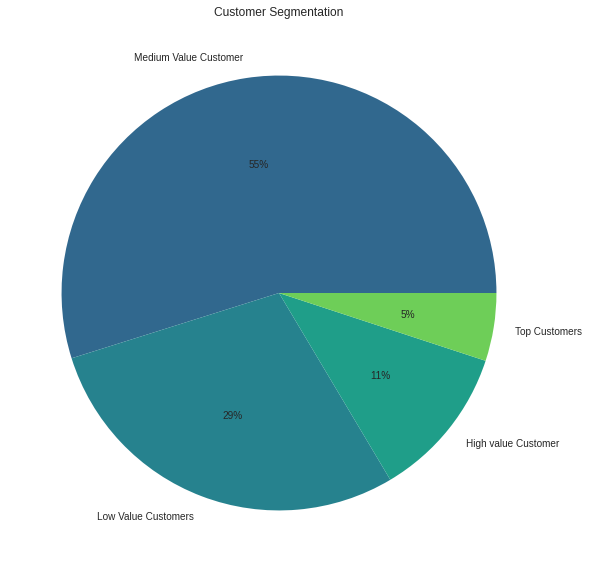

In [66]:
color = ['#31688e','#26828e','#1f9e89','#6ece58']
plt.figure(figsize=(15,10))
plt.pie(RFM.Customer_segment.value_counts(),
            labels=RFM.Customer_segment.value_counts().index,
            autopct='%.0f%%', colors=color)
plt.title('Customer Segmentation')
plt.show()

### CLV Loyality Measure - KPI 

In [67]:
purchase_df = df[df['event_type'] == 'purchase']

# Group the purchase dataframe by user_id and calculate the average order value, purchase frequency, and customer lifespan for each user
user_stats = purchase_df.groupby('user_id').agg(
    average_order_value=('price', 'mean'),
    purchase_frequency=('user_session', 'count'),
    customer_lifespan=('user_session', lambda x: 1 / x.nunique())
)

# Calculate the customer value for each user
user_stats['customer_value'] = user_stats['average_order_value'] * user_stats['purchase_frequency']

# Calculate the CLV for each user
user_stats['clv'] = user_stats['customer_value'] * user_stats['customer_lifespan']

# Analyze the distribution of CLV values
clv_summary = user_stats.describe()

# Identify high-value customers
high_value_customers = user_stats[user_stats['clv'] > user_stats['clv'].mean()]

# Print the CLV summary and high-value customer list
print('CLV Summary:')
print(clv_summary)
print('\nHigh-Value Customers:')
high_value_customers.sort_values(by='clv',ascending=False)

CLV Summary:
       average_order_value  purchase_frequency  customer_lifespan  \
count         52523.000000        52523.000000       52523.000000   
mean              7.773544           10.815091           0.907642   
std              12.759726           13.989572           0.212241   
min              -0.755000            1.000000           0.018519   
25%               3.175000            3.000000           1.000000   
50%               4.770000            6.000000           1.000000   
75%               7.720000           13.000000           1.000000   
max             299.810000          438.000000           1.000000   

       customer_value           clv  
count    52523.000000  52523.000000  
mean        52.216273     40.482416  
std         67.059354     41.941748  
min         -3.020000     -3.020000  
25%         16.660000     15.820000  
50%         33.500000     29.590000  
75%         59.340000     49.257500  
max       2715.870000    905.290000  

High-Value Customers:


,average_order_value,purchase_frequency,customer_lifespan,customer_value,clv
user_id,,,,,
557790271,6.200616,438,0.333333,2715.87,905.29
570967715,8.378889,108,1.000000,904.92,904.92
549368055,4.345577,208,1.000000,903.88,903.88
563937307,9.736047,86,1.000000,837.30,837.30
518278060,4.604128,172,1.000000,791.91,791.91
...,...,...,...,...,...
443174273,8.098000,5,1.000000,40.49,40.49
538357403,1.499630,27,1.000000,40.49,40.49
349074043,5.784286,7,1.000000,40.49,40.49


# Thank You :) 